In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import calendar


# Carregar o dataset
df = pd.read_csv("./data/commerce_dataset_clean.csv", sep=";")

# Vamos verificar as primeiras linhas do dataset para entender sua estrutura
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,...,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name,month,quarter
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,January,1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,March,3,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,March,3,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,January,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,February,2,1


In [44]:
# Vamos começar calculando e apresentando as métricas solicitadas uma a uma, e em seguida criar os gráficos correspondentes.

# Total de vendas no período
total_sales = df["total"].sum()

# Número total de produtos vendidos
total_products_sold = df["quantity"].sum()

# Média de preço unitário por linha de produto
avg_price_per_line = df.groupby("product_line")["unit_price"].mean()

# Linha de produto mais vendido (em termos de quantidade)
most_sold_line = df.groupby("product_line")["quantity"].sum().idxmax()

# As 5 linhas de produtos mais bem avaliados (média de rating mais alta)
top_rated_lines = df.groupby("product_line")["rating"].mean().nlargest(5)

# Loja com o maior volume de vendas
top_sales_branch = df.groupby("branch")["total"].sum().idxmax()

# Método de pagamento mais popular por loja e mês
popular_payment_method = (
    df.groupby(["branch", "month_name"])["payment_method"]
    .agg(lambda x: x.value_counts().idxmax())
    .unstack()
)


# As 3 linhas de produtos com mais quantidades vendidas por gênero do cliente
top_lines_by_gender = (
    df.groupby(["gender", "product_line"])["quantity"]
    .sum()
    .groupby(level=0)
    .nlargest(3)
)

# Produto mais lucrativo (maior receita gross_income) por filial (branch)
most_profitable_product_by_branch = (
    df.groupby(["branch", "product_line"])["gross_income"]
    .sum()
    .groupby(level=0)
    .nlargest(1)
)

# Produto mais lucrativo (maior receita gross_income) por quarter
most_profitable_product_by_quarter = (
    df.groupby(["quarter", "product_line"])["gross_income"]
    .sum()
    .groupby(level=0)
    .nlargest(1)
)

# Período do dia em que ocorre o maior número de vendas
sales_by_time_of_day = df["time_of_day"].value_counts()

# Preparar a análise detalhada por quarter, região e categoria de produto para visualização posterior

# Apresentando os resultados calculados como KPIs
kpi_results = {
    "Total de Vendas no Período": total_sales,
    "Número Total de Produtos Vendidos": total_products_sold,
}

# Vamos prosseguir com a geração de alguns gráficos para as métricas calculadas
kpi_results, avg_price_per_line, most_sold_line, top_rated_lines, top_sales_branch

({'Total de Vendas no Período': 322966.749,
  'Número Total de Produtos Vendidos': 5510},
 product_line
 Electronic accessories    53.551588
 Fashion accessories       57.153652
 Food and beverages        56.008851
 Health and beauty         54.854474
 Home and lifestyle        55.316937
 Sports and travel         56.993253
 Name: unit_price, dtype: float64,
 'Electronic accessories',
 product_line
 Food and beverages        7.113218
 Fashion accessories       7.029213
 Health and beauty         7.003289
 Electronic accessories    6.924706
 Sports and travel         6.916265
 Name: rating, dtype: float64,
 'C')

# Graficos


#### 1 - Total de vendas no período

#### 2 - Número total de produtos vendidos

#### 3 - Média de preço unitário por linha de produto

#### 4 - Linha de produto mais vendido (em termos de quantidade)

#### 5 - As 5 linhas de produtos mais bem avaliados (média de rating mais alta)

#### 6 - Loja com o maior volume de vendas

#### 7 - Método de pagamento mais popular por loja e mês

#### 8 - As 3 linhas de produtos com mais quantidades vendidas por gênero do cliente

#### 9 - Produto mais lucrativo (maior receita gross_income) por filial (branch)

#### 10 - Produto mais lucrativo (maior receita gross_income) por quarter

#### 11 - Período do dia em que ocorre o maior número de vendas

#### 12 - Análise detalhada por quarter, região e categoria de produto para visualização posterior


In [45]:
# 1 - Total de vendas no período - kpi
# 2 - Número total de produtos vendidos - kpi

kpi_results

{'Total de Vendas no Período': 322966.749,
 'Número Total de Produtos Vendidos': 5510}

Média de Preço Unitário por Linha de Produtoproduct_line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: unit_price, dtype: float64 


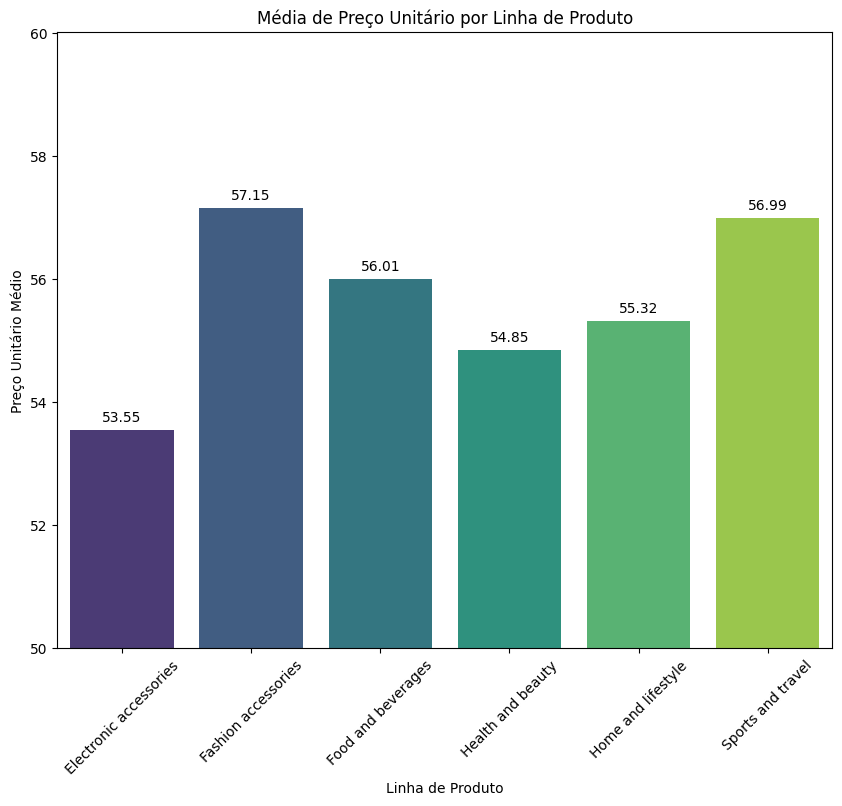

In [46]:
# 3 Média de preço unitário por linha de produto usando seaborn
print(f"Média de Preço Unitário por Linha de Produto{avg_price_per_line} ")

# Vamos criar um gráfico de barras para visualizar a média de preço unitário por linha de produto
plt.figure(figsize=(10, 8))
barplot = sns.barplot(
    x=avg_price_per_line.index,
    y=avg_price_per_line.values,
    hue=avg_price_per_line.index,
    palette="viridis",
)

# Adicionando o valor de cada barra no topo
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title("Média de Preço Unitário por Linha de Produto")
plt.xlabel("Linha de Produto")
plt.ylabel("Preço Unitário Médio")
plt.xticks(rotation=45)

# Deixar o eixo y a partir de 50
plt.ylim(50, None)

plt.show()

Linha de produto mais vendida: Electronic accessories


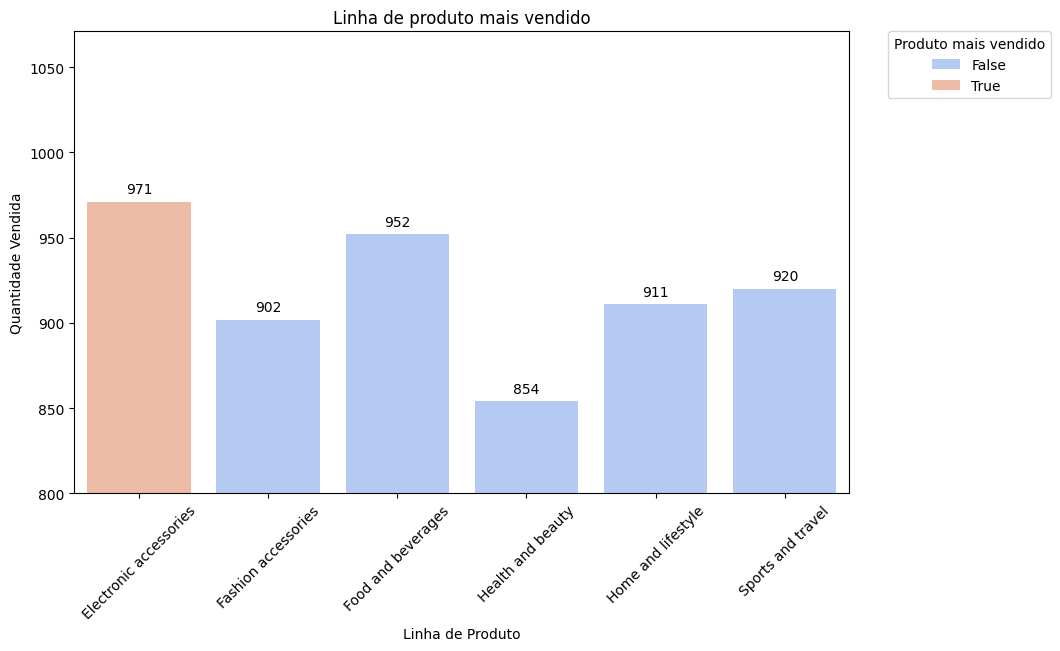

In [47]:
# 4 - Linha de produto mais vendido (em termos de quantidade) -> usando seaborn e deixando uma cor diferente para a linha de produto mais vendida
print(f"Linha de produto mais vendida: {most_sold_line}")

# Calcule a quantidade vendida por linha de produto
quantity_per_product_line = df.groupby("product_line")["quantity"].sum().reset_index()

# Encontre a linha de produto mais vendida
most_sold_product = quantity_per_product_line.loc[
    quantity_per_product_line["quantity"].idxmax(), "product_line"
]

# Crie uma nova coluna que é True para a linha de produto mais vendida e False para as outras
quantity_per_product_line["is_most_sold"] = (
    quantity_per_product_line["product_line"] == most_sold_product
)

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x="product_line",
    y="quantity",
    hue="is_most_sold",
    data=quantity_per_product_line,
    palette="coolwarm",
)

# Adicionando o valor de cada barra no topo
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.title("Linha de produto mais vendido")
plt.xlabel("Linha de Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)

# Limitando o eixo y a partir de 800
plt.ylim(800, quantity_per_product_line["quantity"].max() + 100)

# Alterando o título da legenda
plt.legend(
    title="Produto mais vendido", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0
)

plt.show()

As 5 linhas de produtos mais bem avaliados (média de rating mais alta): 
product_line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Name: rating, dtype: float64


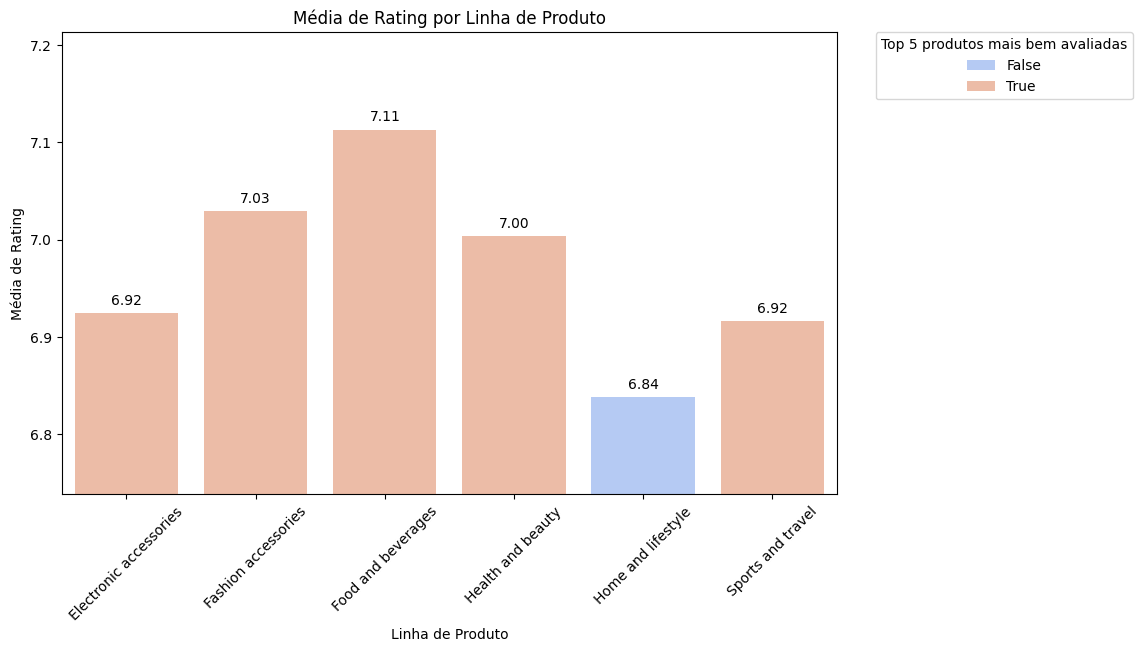

In [48]:
# 5 - As 5 linhas de produtos mais bem avaliados (média de rating mais alta) -> usando seaborn e deixando uma cor diferente para as linhas de produto mais bem avaliadas
print(
    f"As 5 linhas de produtos mais bem avaliados (média de rating mais alta): \n{top_rated_lines}"
)

# Calcule a média de rating para cada linha de produto

average_rating = df.groupby("product_line")["rating"].mean().reset_index()

# Selecione as 5 linhas de produtos com a média de rating mais alta
top5_product_lines = average_rating["rating"].nlargest(5).index

# Crie uma nova coluna que é True para as top 5 linhas de produtos e False para as outras
average_rating["is_top5"] = average_rating.index.isin(top5_product_lines)

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x="product_line", y="rating", hue="is_top5", data=average_rating, palette="coolwarm"
)

# Adicionando o valor de cada barra no topo
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".2f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.title(
    "Média de Rating por Linha de Produto"
)  # As 5 linhas de produtos mais bem avaliados com uma cor diferente
plt.xlabel("Linha de Produto")
plt.ylabel("Média de Rating")
plt.xticks(rotation=45)

# Ajuste os limites do eixo y para dar um zoom
plt.ylim(average_rating["rating"].min() - 0.1, average_rating["rating"].max() + 0.1)

# Alterando o título da legenda
plt.legend(
    title="Top 5 produtos mais bem avaliadas",
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)

plt.show()

Loja com o maior volume de vendas: C


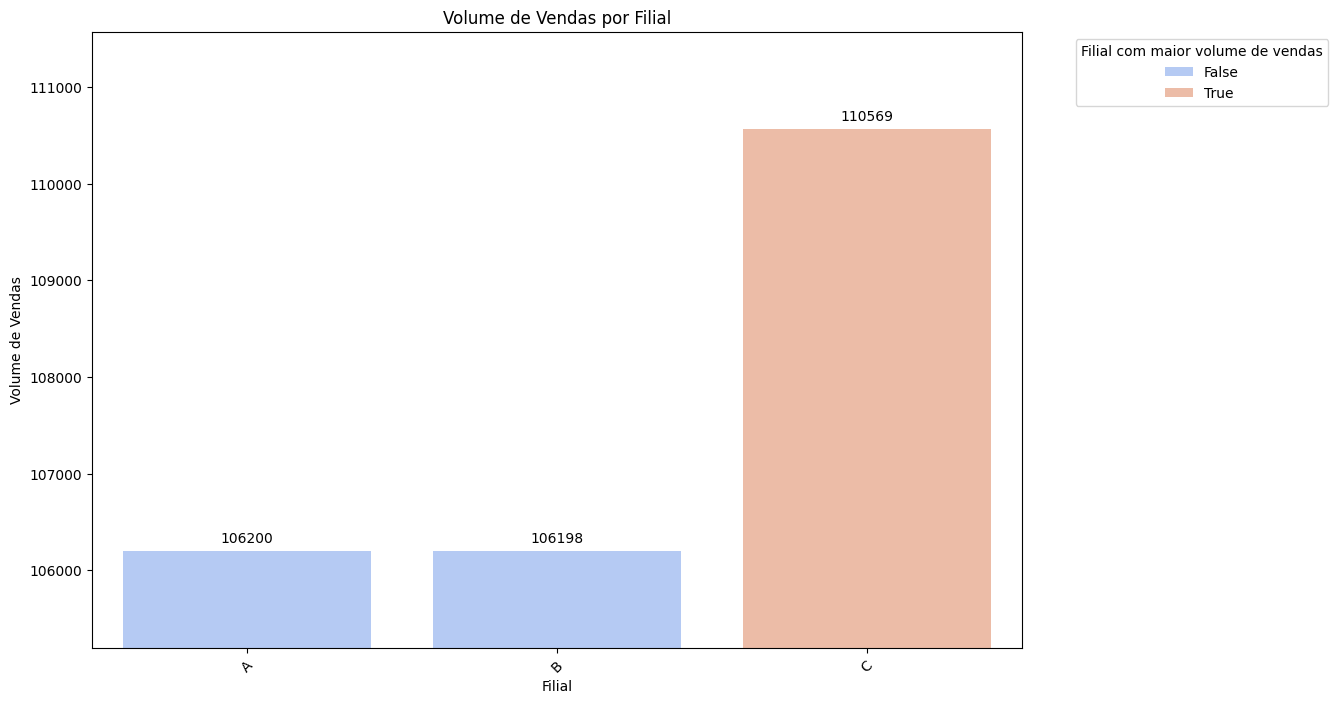

In [49]:
# 6 - Loja com o maior volume de vendas
print(f"Loja com o maior volume de vendas: {top_sales_branch}")

# Calcule o volume de vendas por filial
sales_per_branch = df.groupby("branch")["total"].sum().reset_index()

# Crie uma nova coluna que é True para a filial com o maior volume de vendas e False para as outras
sales_per_branch["is_top"] = sales_per_branch["branch"] == top_sales_branch

# Crie o gráfico de barras
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x="branch",
    y="total",
    hue="is_top",
    data=sales_per_branch,
    palette="coolwarm",
    dodge=False,
)

# Adicionando o valor de cada barra no topo
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.title("Volume de Vendas por Filial")
plt.xlabel("Filial")
plt.ylabel("Volume de Vendas")
plt.xticks(rotation=45)

# Ajuste os limites do eixo y para dar um zoom
plt.ylim(sales_per_branch["total"].min() - 1000, sales_per_branch["total"].max() + 1000)

# Alterando o título da legenda e movendo-a para o lado do gráfico
plt.legend(
    title="Filial com maior volume de vendas",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

plt.show()

Método de pagamento mais popular por loja e mês: 
month_name      January February    March
branch                                   
A               Ewallet  Ewallet  Ewallet
B           Credit card     Cash  Ewallet
C                  Cash     Cash     Cash


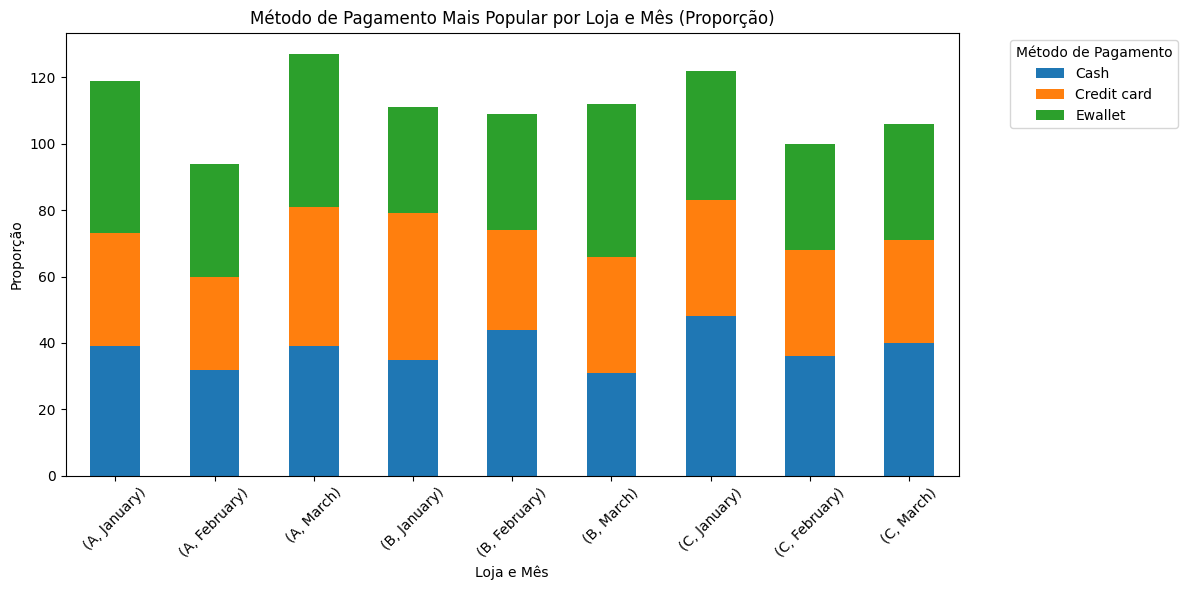

In [50]:
# 7 - Método de pagamento mais popular por loja e mês -> opassar para proporção

# Definir a ordem correta dos meses
month_order = [calendar.month_name[i] for i in range(1, 4)]

# Converter 'month_name' para tipo categórico com a ordem correta dos meses
df["month_name"] = pd.Categorical(
    df["month_name"], categories=month_order, ordered=True
)

# Agora, execute o agrupamento e a impressão novamente
popular_payment_method = (
    df.groupby(["branch", "month_name"], observed=True)["payment_method"]
    .agg(lambda x: x.value_counts().idxmax())
    .unstack()
)

# printar
print(f"Método de pagamento mais popular por loja e mês: \n{popular_payment_method}")

# Converter 'month_name' para tipo categórico com a ordem correta dos meses
df["month_name"] = pd.Categorical(
    df["month_name"], categories=month_order, ordered=True
)

# Método de pagamento mais popular por loja e mês: Gráficos de barras empilhadas
payment_method_popularity = (
    df.groupby(["branch", "month_name", "payment_method"], observed=True)
    .size()
    .unstack()
    .fillna(0)
)

# # Normalizando os dados
# payment_method_proportion = payment_method_popularity.div(
#     payment_method_popularity.sum(axis=1), axis=0
# )

# Plotando o gráfico de barras empilhadas
payment_method_popularity.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Método de Pagamento Mais Popular por Loja e Mês (Proporção)")
plt.xlabel("Loja e Mês")
plt.ylabel("Proporção")
plt.xticks(rotation=45)
plt.legend(title="Método de Pagamento", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

As 3 linhas de produtos com mais quantidades vendidas por gênero do cliente: 
gender  gender  product_line          
Female  Female  Fashion accessories       530
                Food and beverages        514
                Home and lifestyle        498
Male    Male    Health and beauty         511
                Electronic accessories    483
                Food and beverages        438
Name: quantity, dtype: int64


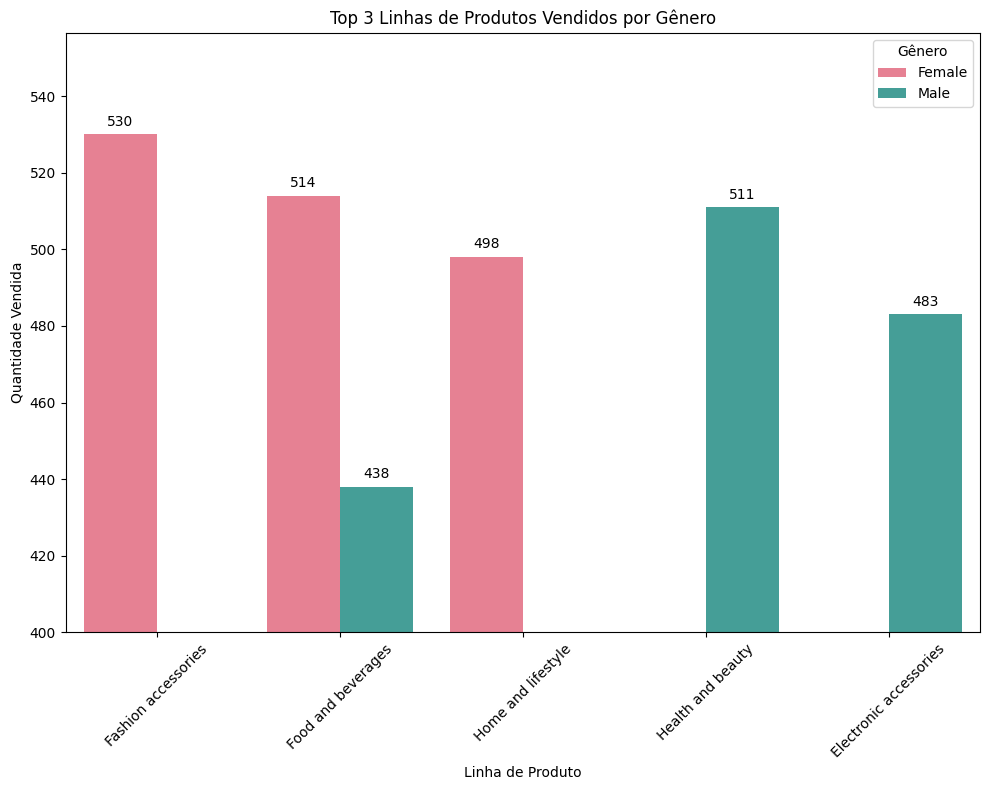

In [51]:
# 8 - As 3 linhas de produtos com mais quantidades vendidas por gênero do cliente

# top_lines_by_gender
print(
    f"As 3 linhas de produtos com mais quantidades vendidas por gênero do cliente: \n{top_lines_by_gender}"
)

# Agrupando os dados por gênero e linha de produto para somar as quantidades vendidas

gender_product_sales = (
    df.groupby(["gender", "product_line"])["quantity"].sum().reset_index()
)


# Identificando as 3 linhas de produtos mais vendidas por gênero
top_gender_product_sales = (
    gender_product_sales.groupby("gender")[["gender", "product_line", "quantity"]]
    .apply(lambda x: x.nlargest(3, "quantity"))
    .reset_index(drop=True)
)


# Criando o gráfico em seaborn
plt.figure(figsize=(10, 8))

barplot = sns.barplot(
    data=top_gender_product_sales,
    x="product_line",
    y="quantity",
    hue="gender",
    # palette="spring",
    # palette="PiYG",
    palette=sns.color_palette("husl", 2),
)

# Definindo os limites do eixo y para mostrar apenas valores acima de 400
plt.ylim(400, None)

# Adicionando o valor de cada barra no topo
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.title("Top 3 Linhas de Produtos Vendidos por Gênero")
plt.xlabel("Linha de Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.legend(title="Gênero")
plt.tight_layout()

plt.show()

Produto mais lucrativo (maior receita gross_income) por filial: 
branch  branch  product_line      
A       A       Home and lifestyle    1067.4855
B       B       Sports and travel      951.8190
C       C       Food and beverages    1131.7550
Name: gross_income, dtype: float64


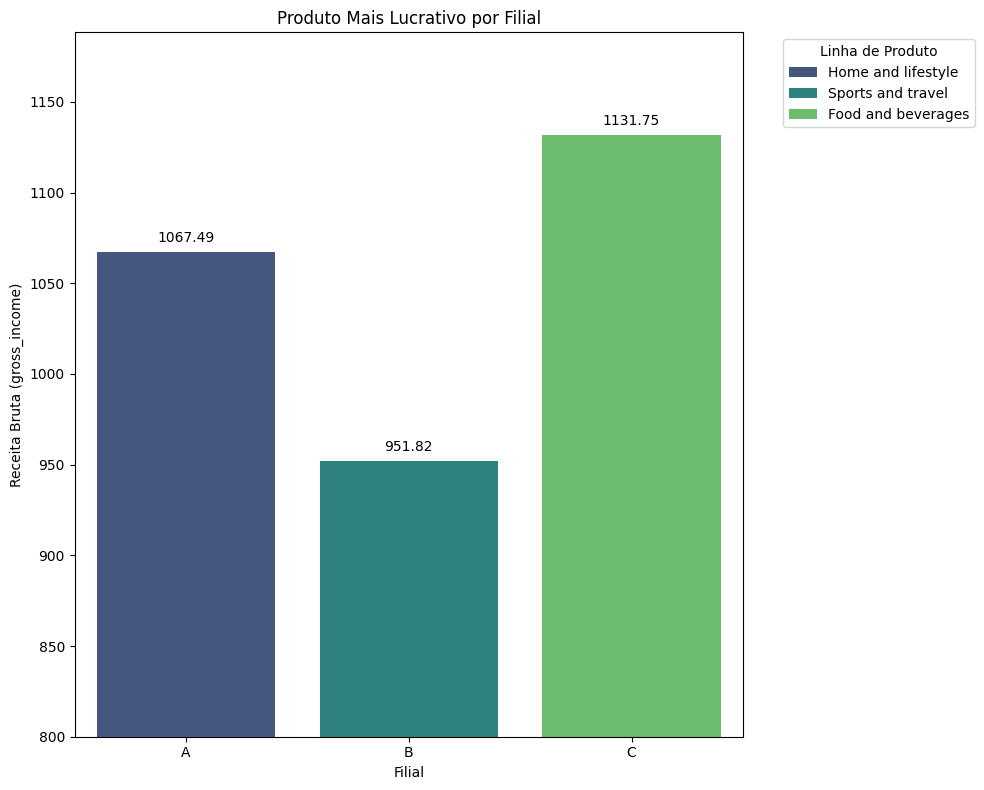

In [52]:
# 9 - Produto mais lucrativo (maior receita gross_income) por filial (branch)
print(
    f"Produto mais lucrativo (maior receita gross_income) por filial: \n{most_profitable_product_by_branch}"
)

# Calculando o produto mais lucrativo por filial (branch) em termos de gross_income
most_profitable_product_by_branch = (
    df.groupby(["branch", "product_line"])["gross_income"].sum().reset_index()
)

# Identificando o produto mais lucrativo por filial
most_profitable_product_by_branch = most_profitable_product_by_branch.sort_values(
    ["branch", "gross_income"], ascending=[True, False]
).drop_duplicates(["branch"])

# Ordenando as filiais em ordem alfabética
most_profitable_product_by_branch = most_profitable_product_by_branch.sort_values(
    "branch"
)

# Criando o gráfico em seaborn para visualizar o produto mais lucrativo por filial
plt.figure(figsize=(10, 8))
barplot = sns.barplot(
    data=most_profitable_product_by_branch,
    x="branch",
    y="gross_income",
    hue="product_line",
    dodge=False,
    palette="viridis",
)

# Adicionar anotações de texto para cada barra
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".2f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )

# Definindo os limites do eixo y para mostrar apenas valores acima de 800
plt.ylim(800, None)

plt.title("Produto Mais Lucrativo por Filial")
plt.xlabel("Filial")
plt.ylabel("Receita Bruta (gross_income)")

# Movendo a legenda para o lado do gráfico
plt.legend(title="Linha de Produto", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

plt.show()

Produto mais lucrativo (maior receita gross_income) por quarter: 
quarter  quarter  product_line      
1        1        Food and beverages    2673.564
Name: gross_income, dtype: float64


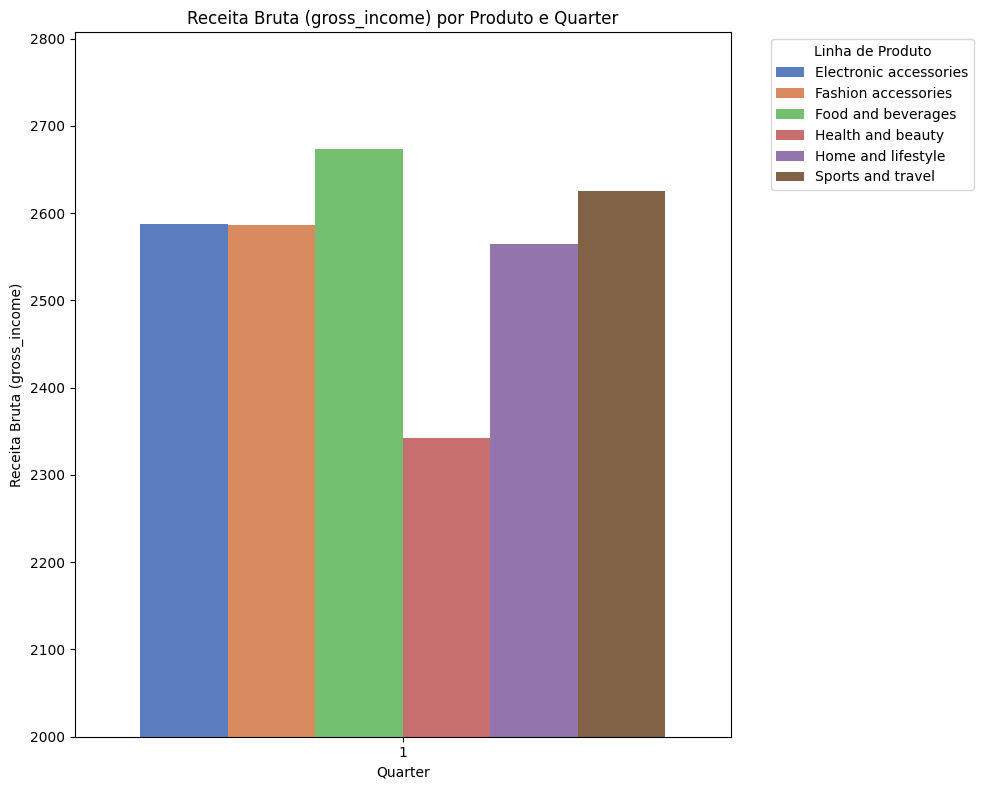

In [53]:
# 10 - Produto mais lucrativo (maior receita gross_income) por quarter
print(
    f"Produto mais lucrativo (maior receita gross_income) por quarter: \n{most_profitable_product_by_quarter}"
)

# Calculando a receita bruta por produto e quarter
gross_income_by_quarter_product = (
    df.groupby(["quarter", "product_line"])["gross_income"].sum().reset_index()
)

# Identificando o produto mais lucrativo por quarter para destacá-lo
most_profitable_each_quarter = gross_income_by_quarter_product.loc[
    gross_income_by_quarter_product.groupby("quarter")["gross_income"].idxmax()
]

# Definindo uma nova coluna para marcar o produto mais lucrativo em cada quarter
gross_income_by_quarter_product["most_profitable"] = (
    gross_income_by_quarter_product.apply(
        lambda x: (
            "Most Profitable"
            if (x["quarter"], x["product_line"])
            in most_profitable_each_quarter[["quarter", "product_line"]].values
            else "Other"
        ),
        axis=1,
    )
)


# Agora, criando o gráfico com Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(
    data=gross_income_by_quarter_product,
    x="quarter",
    y="gross_income",
    hue="product_line",
    palette="muted",
)

# Definindo os limites do eixo y para mostrar apenas valores acima de 2000
plt.ylim(2000, None)

plt.title("Receita Bruta (gross_income) por Produto e Quarter")
plt.xlabel("Quarter")
plt.ylabel("Receita Bruta (gross_income)")
plt.legend(title="Linha de Produto", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()


plt.show()

Produto mais lucrativo (maior receita gross_income) por quarter: 
quarter  quarter  product_line      
1        1        Food and beverages    2673.564
Name: gross_income, dtype: float64


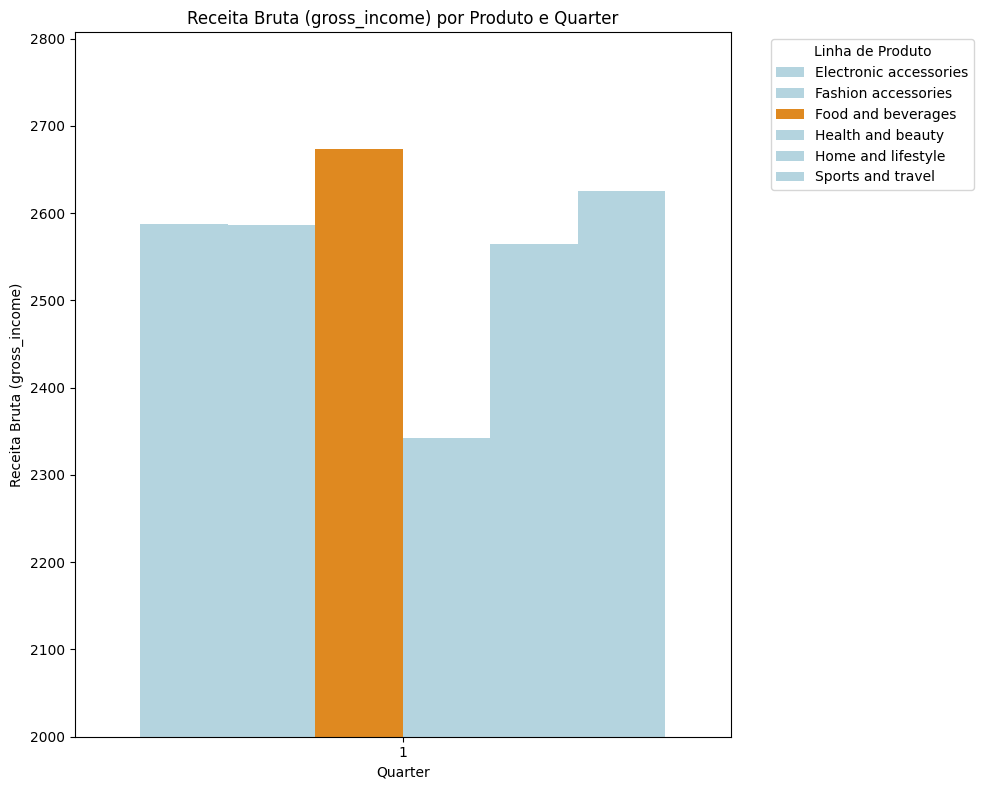

In [54]:
# 10 - Produto mais lucrativo (maior receita gross_income) por quarter
print(
    f"Produto mais lucrativo (maior receita gross_income) por quarter: \n{most_profitable_product_by_quarter}"
)

# Calculando a receita bruta por produto e quarter
gross_income_by_quarter_product = (
    df.groupby(["quarter", "product_line"])["gross_income"].sum().reset_index()
)

# Identificando o produto mais lucrativo por quarter para destacá-lo
most_profitable_each_quarter = gross_income_by_quarter_product.loc[
    gross_income_by_quarter_product.groupby("quarter")["gross_income"].idxmax()
]

# Definindo uma nova coluna para marcar o produto mais lucrativo em cada quarter
gross_income_by_quarter_product["most_profitable"] = (
    gross_income_by_quarter_product.apply(
        lambda x: (
            "Most Profitable"
            if (x["quarter"], x["product_line"])
            in most_profitable_each_quarter[["quarter", "product_line"]].values
            else "Other"
        ),
        axis=1,
    )
)


# Agora, criando o gráfico com Seaborn
plt.figure(figsize=(10, 8))

# Criando uma lista de cores onde todas as barras têm a mesma cor, exceto a barra com o valor mais alto
colors = [
    (
        "lightblue"
        if (x["quarter"], x["product_line"])
        not in most_profitable_each_quarter[["quarter", "product_line"]].values
        else "darkorange"
    )
    for index, x in gross_income_by_quarter_product.iterrows()
]

sns.barplot(
    data=gross_income_by_quarter_product,
    x="quarter",
    y="gross_income",
    hue="product_line",
    palette=colors,
)

# Definindo os limites do eixo y para mostrar apenas valores acima de 2000
plt.ylim(2000, None)

plt.title("Receita Bruta (gross_income) por Produto e Quarter")
plt.xlabel("Quarter")
plt.ylabel("Receita Bruta (gross_income)")
plt.legend(title="Linha de Produto", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()

Período do dia em que ocorre o maior número de vendas: 
time_of_day
evening      432
afternoon    377
morning      191
Name: count, dtype: int64


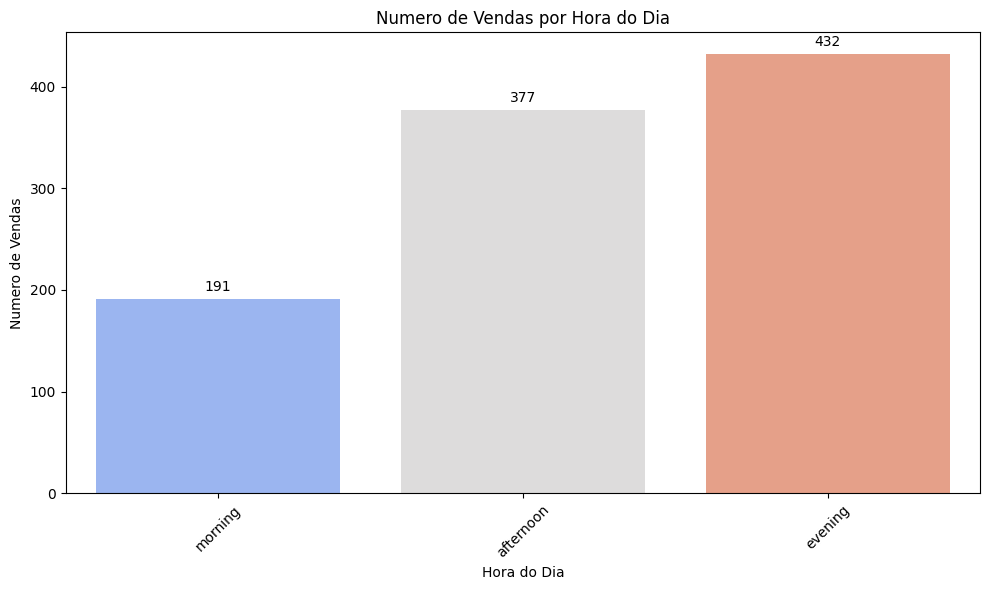

In [55]:
# 11 - Período do dia em que ocorre o maior número de vendas
print(
    f"Período do dia em que ocorre o maior número de vendas: \n{sales_by_time_of_day}"
)

# Calculando o número de vendas por período do dia
sales_by_time_of_day = df["time_of_day"].value_counts().reset_index()
sales_by_time_of_day.columns = ["time_of_day", "sales_count"]

# Convertendo 'time_of_day' para uma categoria e definindo a ordem
sales_by_time_of_day["time_of_day"] = pd.Categorical(
    sales_by_time_of_day["time_of_day"],
    categories=["morning", "afternoon", "evening"],
    ordered=True,
)

# Ordenando por 'time_of_day'
sales_by_time_of_day.sort_values("time_of_day", inplace=True)

# Criando o gráfico no Seaborn para visualizar o número de vendas por período do dia
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=sales_by_time_of_day,
    x="time_of_day",
    y="sales_count",
    hue="time_of_day",
    palette="coolwarm",
    legend=False,
)


# Adicionando o valor de cada barra no topo
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.title("Numero de Vendas por Hora do Dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Numero de Vendas")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [56]:
# 12 - Análise detalhada por quarter, região e categoria de produto para visualização posterior
